<a href="https://colab.research.google.com/github/Geetika-Madan/covidrepository_majorproject/blob/master/majorproject_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fbprophet


In [ ]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


In [ ]:
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={'variable':'Date', "value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
    new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
    return new_df

In [ ]:
import pandas as pd


In [ ]:
confirm_df = get_n_melt_data(confirmed_cases,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases,"Recovered")
deaths_df = get_n_melt_data(death_cases,"Deaths")

In [ ]:
import datetime
d_t_n=datetime.datetime.now()
print(d_t_n)


2020-09-09 16:18:35.902791


In [ ]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
61441,NaN,West Bank and Gaza,31.952200,35.233200,9/8/20,27363
61442,NaN,Western Sahara,24.215500,-12.885800,9/8/20,10
61443,NaN,Yemen,15.552727,48.516388,9/8/20,1994
61444,NaN,Zambia,-13.133897,27.849332,9/8/20,12952
61445,NaN,Zimbabwe,-19.015438,29.154857,9/8/20,7388


In [ ]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [ ]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
61441,NaN,West Bank and Gaza,31.952200,35.233200,9/8/20,27363,NaN,190
61442,NaN,Western Sahara,24.215500,-12.885800,9/8/20,10,NaN,1
61443,NaN,Yemen,15.552727,48.516388,9/8/20,1994,NaN,576
61444,NaN,Zambia,-13.133897,27.849332,9/8/20,12952,NaN,297
61445,NaN,Zimbabwe,-19.015438,29.154857,9/8/20,7388,NaN,218


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [ ]:
df['Province/State'].nunique()

81

In [ ]:
df.shape

(61446, 8)

In [ ]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [ ]:
df_per_day.tail()

,Confirmed,Recovered,Deaths
Date,,,
9/4/20,26617971,0.0,874639
9/5/20,26881547,0.0,879577
9/6/20,27103845,0.0,883339
9/7/20,27337760,0.0,892646
9/8/20,27570742,0.0,897383


In [ ]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,2.310000e+02,2.310000e+02,231.000000
mean,7.714089e+06,4.331277e+06,332676.974026
std,8.265270e+06,5.594224e+06,291458.232549
min,5.550000e+02,0.000000e+00,17.000000
25%,2.607980e+05,6.898150e+04,10720.500000
50%,4.639021e+06,1.429426e+06,314424.000000
75%,1.300917e+07,7.047116e+06,567646.500000
max,2.757074e+07,2.157014e+07,897383.000000


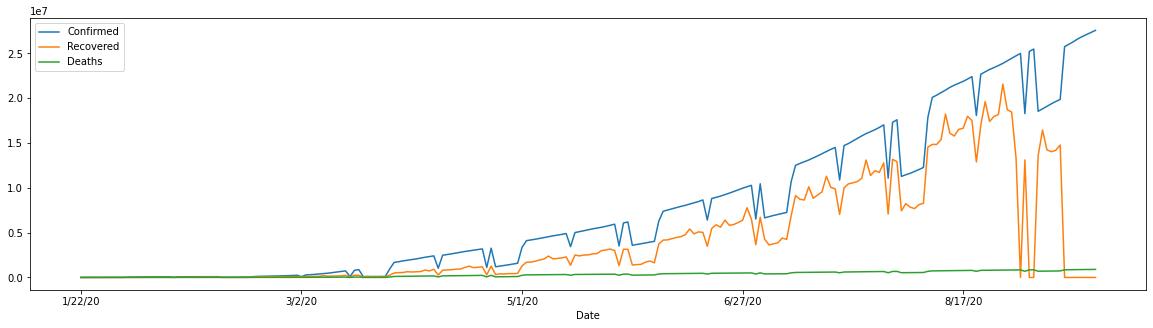

In [ ]:
df_per_day.plot(kind='line',figsize=(20,5))

In [ ]:
import fbprophet

In [ ]:
from fbprophet import Prophet
import plotly
m = Prophet(weekly_seasonality=False)

In [ ]:
m.add_seasonality(name="monthly",period=40.5,fourier_order=5)

In [ ]:
df_per_day.head()

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28.0,17
1/23/20,654,30.0,18
1/24/20,941,36.0,26
1/25/20,1434,43.0,42
1/26/20,2118,102.0,56


In [ ]:
global_cases = df_per_day.reset_index()

In [ ]:
global_cases.tail()

,Date,Confirmed,Recovered,Deaths
226,9/4/20,26617971,0.0,874639
227,9/5/20,26881547,0.0,879577
228,9/6/20,27103845,0.0,883339
229,9/7/20,27337760,0.0,892646
230,9/8/20,27570742,0.0,897383


In [ ]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [ ]:
confirmed_cases.shape

(231, 2)

In [ ]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train = confirmed_cases[:40]
test = confirmed_cases[40:]

In [ ]:
train.tail()

,ds,y
35,2/6/20,30802
36,2/7/20,34395
37,2/8/20,37129
38,2/9/20,40159
39,3/1/20,88395


In [ ]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = m.make_future_dataframe(periods=50) #periods=40
future_dates.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [ ]:
prediction =  m.predict(future_dates)

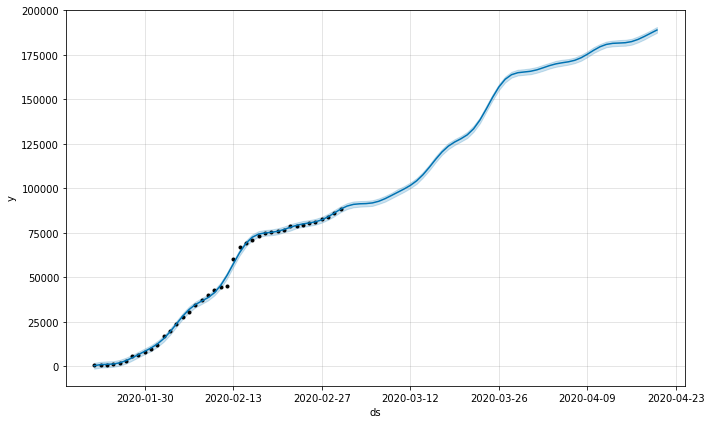

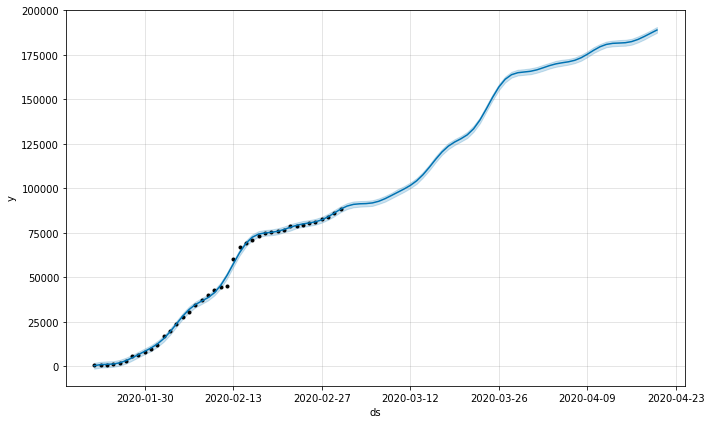

In [ ]:
m.plot(prediction)

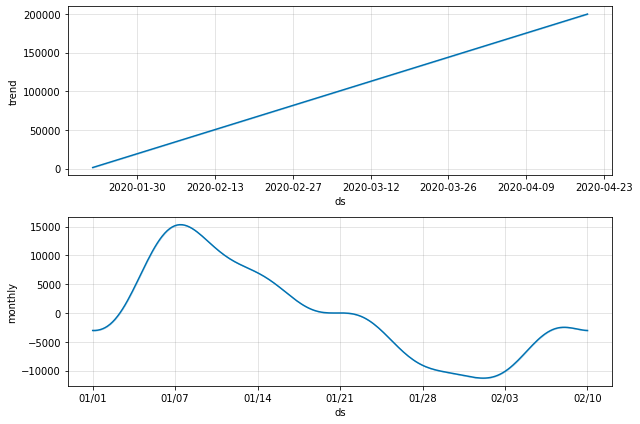

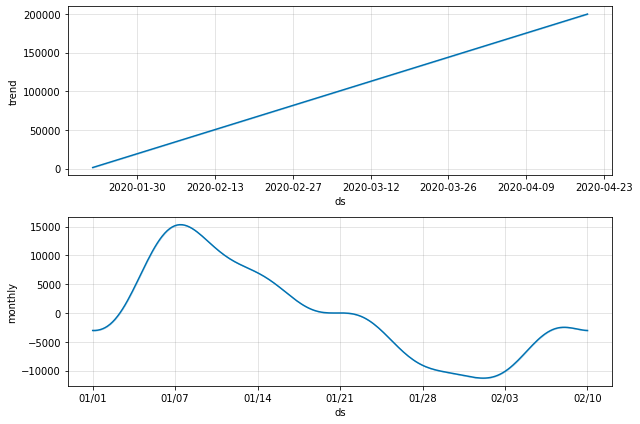

In [ ]:
m.plot_components(prediction)

In [ ]:
test

,ds,y
40,3/10/20,118967
41,3/11/20,126675
42,3/12/20,132450
43,3/13/20,146783
44,3/14/20,157801
...,...,...
226,9/4/20,26617971
227,9/5/20,26881547
228,9/6/20,27103845
229,9/7/20,27337760


In [ ]:
test['dates'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test

,ds,y,dates
40,3/10/20,118967,2020-03-10
41,3/11/20,126675,2020-03-11
42,3/12/20,132450,2020-03-12
43,3/13/20,146783,2020-03-13
44,3/14/20,157801,2020-03-14
...,...,...,...
226,9/4/20,26617971,2020-09-04
227,9/5/20,26881547,2020-09-05
228,9/6/20,27103845,2020-09-06
229,9/7/20,27337760,2020-09-07


In [ ]:
test = test.set_index("dates")

In [ ]:
test = test['y']

In [ ]:
import matplotlib.pyplot as plt

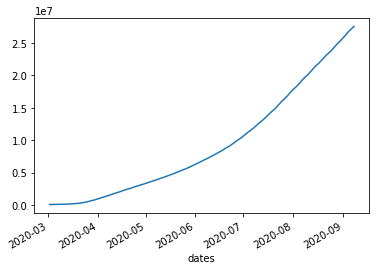

In [ ]:
test.plot()

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

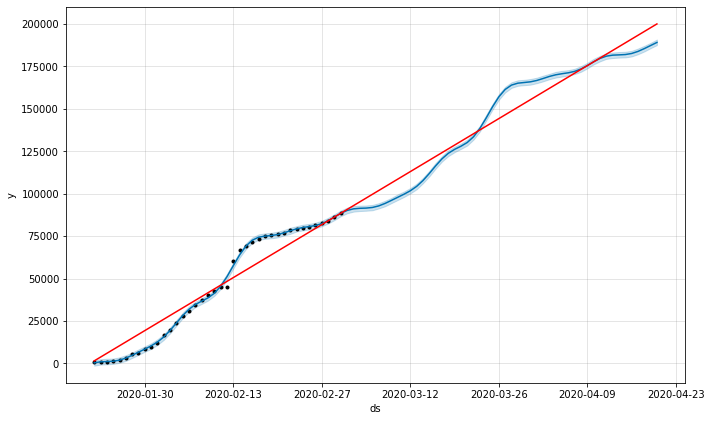

In [ ]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)

In [ ]:
#ended-covid time series prediction using prophet